# TMA 01, question 2

**Name**: [Pablo Toledo]
    
**PI**: [C4451553]

This TMA question gives you the opportunity to demonstrate your mastery of the techniques in carrying out a small-scale data analysis. In the TMA, you will apply some of the ideas that you've seen in the module so far.

Specifically, this question requires you to obtain and clean two datasets, combine and reshape them, and graphically present the cleaned data. All the techniques required to answer this question can be found in Parts 2-5, and are illustrated in the associated notebooks.

In question 1, you started looking at the Devon manholes dataset. In this question, you are required to combine some of the information from this dataset with some data from the Devon County Council Property Assets dataset, which you can download from this site:

    https://data.gov.uk/dataset/dcc-property-assets



For this question, you are asked to produce a graphical representation of the number of manhole covers, and the number of schools, in each parish in Devon.

To do this, you must produce a pandas dataframe, so that for each parish in Devon, the number of manhole covers is listed, and the number of schools in the parish. The final dataframe should look something like this:



||Parish|Number_of_manhole_covers|Number_of_schools|
|---|---|---|---|
|**0**|Sourton CP | 45 | 12 |
|**1**|Northam CP | 23 | 1 |
|$\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |


(although note that the figures 45, 12, 23 and 1 are just for illustration; they are not necessarily the correct values for the question).


You should then construct a plot showing the number of manhole covers and the number of schools for each parish, and give an explanation of what you believe the plot shows.

This question requires that you complete a number of tasks:

1. You must obtain the datasets from the two sites. This task uses the techniques described in Part 2.

2. You need to examine the datasets. You should consider questions such as how missing data is handled, whether there is any dirtiness or ambiguity in the data, and any differences in how data is represented in the two datasets. This task uses the techniques described in Part 3, section 2.

3. You will need to capture the data in a dataframe in the form described above. This task uses the techniques described in Part 3, section 3 and Part 4.

4. Finally, you should select a visualisation method for the data in the dataset, and present a plot of the data, with a description of how you think it should be interpreted. This task uses the techniques described in Part 5.


It is crucial for this question to bear in mind that at each stage, you must describe what you have done in sufficient detail that someone could replicate your work. This means that you must:

* explain what any code that you have written does, and execute it in the body of your submitted notebook,

* where you have used tools that are not accessed via python or the Notebooks (such as OpenRefine), you should include some screenshots to show what you did, and to help the marker understand your thinking,

* clearly explain any assumptions or simplifications that you have made about the data, and

* interpret your final results in the context of these assumptions and simplifications.


Some guidance on presentation:

* You must present your answer in this notebook.
    
* Do not put too much text or code into each notebook cell. Each cell should contain one or two paragraphs at most, or around ten lines of python.

* Ensure that in your code, you use meaningful variable names.

* You should have a specific cell whose return value is the dataframe described above.

* You should have a specific cell which plots the data in the dataframe.

### 40 marks

PART 1 - ACQUIRING THE DATA
To begin with, I downloaded the manhole cover data as a CSV file from 
the following site: https://data.gov.uk/dataset/manholes-in-devon. Both CSV, JSON and XML formats were available, but given the simple tabular nature of the manhole cover data, there seemed little benefit in working with JSON or XML data (both of which are better suited structured document data).

We've also been provided with property assets data (again, in CSV format),
previously downloaded from https://data.gov.uk/dataset/dcc-property-assets

PART 2 - 
On inspecting the manhole cover data, we can see that we have a simple table, with one row per manhole cover. Each row has the following attributes: ITEM_TYPE_NAME, ITEM_UID, STREET_DESCRIPTOR, ITEM_IDENTITY_CODE, START_DATE, PARISH_NAME, MATERIAL_TYPE_NAME, EASTING, NORTHING.

Immediately see that there are a number of missing values for MATERIAL_TYPE_NAME and the STREET_DESCRIPTOR set to 'Dummy Street'. Of most concern to us however are missing values for PARISH_NAME (represented by question marks), as we will certainly need these to calculate the number of manhole covers per parish.

We will therefore have to do some data cleansing here, and either fix these rows (by extrapolating the parish from the STREET_DESCRIPTOR, EASTING or NORTHING) or remove them altogether. Once this is done we can remove all columns apart from ITEM_TYPE_NAME and PARISH_NAME, and then create a pivot table to show the number of manhole covers per parish name.

Now looking at the buildings data, we can again see we have a simple table, this time with each row representing a building in the Devon area. Each row has the following attributes: SITE_UPRN, SITE_NAME, PRIMARY_ADDRESS, STREET, LOCALITY, TOWN, COUNTY, POSTCODE, GIA, EASTING, NORTHING, PARISH, DISTRICT, SUBCLIENT, SITESTATUS, SITEFUNCTIONDETAIL. 

This data appears complete from a cursory glance, but for some reason every other row is blank. These will have to be removed before we can use the data to calculate the school count per parish.

Of the columns available to us, we are only interested in PARISH, SUBLCIENT (which holds the class of building e.g. 'Education schools', 'youth services') and SITEFUNCTIONDETAIL (which holds the type of building e.g. 'pre-school', 'primary school', 'secondary school' etc.).

On looking briefly at the buildings data, it is apparent that there are entries for a number of different types of schools, such as pre-school, primary school, secondary school, special schools etc. This throws up an interesting question regarding the task. Should we include all types of school in the final count of schools per parish, or only mainstream primary and secondary schools? I decided that we should only include schools that form mandatory education, i.e. primary school, secondary school, as this is what is most commonly understood by the term 'school' when looking at the results.

In order to create the final dataframe, with the count of manhole covers and schools for each parish, we will have to join the above 2 tables using the parish name. In order to do this we must first ensure the data is harmonised, so that parish names (and boundaries) are consistent across both datasets, otherwise the resulting table will be incorrect. The parish column is also differently named in both tables (PARISH_NAME in the manhole table, and PARISH in the bulidings data), so we'll have to rename one of the columns in order to join the tables successfully.

PART 2 - CLEANSING THE DATA USING OPEN REFINE
To begin with, I'll use Open Refine to clean the manhole cover data, and create a new CSV file (called manhole_cleaned.csv) which can be imported into a Panda Dataframe.

I'll first import the downloaded CSV file, using the default CSV encodings. I uncheck the 'store blank rows' option, as we have no need to do so. We have 77964 rows, and the preview of the first 10 looks reasonable, giving me confidence the import was successful.  

Working left to right, the first thing I do is check that each row is of type MANHOLE. Using the text facet option from the ITEM_TYPE_NAME, we can see that this is indeed the case. 

<img src="openrefine_screenshot1.png">

Next we'll deal with rows where the PARISH_NAME column is populated with a '?'. Using the text facet feature we can see there are 324 of those. These rows have to be either fixed, or removed. Initially, I thought that each row with a missing parish could by fixed by either by using the STREET_DESCRIPTOR, or a combination of EASTING and NORTHING to look up the location on a map and then work out the parish. However, I wondered if there might be other reasons as to why the parish wasn't populated. Perhaps some manhole covers didn't fall within a specific parish? Some quick research into parishes indeed reveal that some areas are 'unparished', which might explain some of these rows (see https://en.wikipedia.org/wiki/List_of_civil_parishes_in_Devon). There may be other reasons for these rows - missing data for instance. But 328 rows out of 77,964 represents just 0.4% of the size of the dataset, and so the effect of removing them should be negligible on the final analysis. I therefore remove them using the 'Remove matching rows' option. Open refine now shows no rows with a '?' for a parish name. 

<img src="openrefine_screenshot2.png">

Next, we can remove the unwanted columns and just retain ITEM_TYPE_NAME and PARISH_NAME. Again, we can select these columns in Open Refine and select Edit Column > Remove this column. 

<img src="openrefine_screenshot3.png">

Now I export the data as a CSV, saving it to a file called manhole_cleaned.csv.

Next, I'll clean the buildings data in a similar fashion. On importing the data into Open Refine I uncheck the 'store blank rows' option, which removes the blank rows. The preview looks good, and we have 1276 rows of data.

I notice the last row has a value 'road' for its SITE_UPRN, with a site name of  'ENTRY TO HANDLE ROAD SCHEMES LEASES and PTR's' . Clearly this row is attempting to capture a road instead of a building, so I remove it.

<img src="openrefine_screenshot4.png">

Next I select only those rows with a SITEFUNCTIONDETAIL of 'Primary School', 'Secondary School' and 'Secondard School - Foundation'. There are 509 matching rows. I notice something interesting. For each school more than 1 building may be listed. For example, CLYST HYDON PRIMARY SCHOOL has 3 sites: MAIN SCHOOL SITE, DETACHED PLAYING FIELD and VILLAGE HALL SITE. Clearly we don't want to count individual buildings as this will distort the figures. In order to get a count of unique schools we will therefore have to group individual school buildings together. The postcode field seems like our best bet for doing this (the above 3 buildings all share the same postcode). If the postcode represents the school main site, rather than the postcode of the individual building, then this grouping will work. If on the other hand it represents the postcode of the building, then we have have an issue if some schools which had various buildings spread out geographically. We can check this after we've applied the grouping, and apply a further grouping as required.

Next I invert the selection and remove all the non-school rows. Then I remove unwanted columns - SITE_UPRN, PRIMARY_ADDRESS, GIA, EASTING, NORTHING, DISTRICT, SUBCLIENT, SITESTATUS, SITEFUNCTIONDETAIL. I retain PARISH, and STREET, LOCALITY, TOWN, COUNTY, POSTCODE in order to group buildings by school. I then export the cleaned data and save it to buildings_cleaned.csv.

<img src="openrefine_screenshot5.png">

PART 3 - CAPTURING THE DATA IN A DATAFRAME.
First, I'll import the manhole cover data into a dataframe:

In [1]:
#import panads and dataframe library
import pandas as pd
from pandas import DataFrame
pd.set_option('notebook_repr_html', False)
pd.set_option('max_rows', 20)


#read manhole_cleaned.csv file into dataframe
manholes_df = pd.read_csv('data/Manhole_cleaned.csv')

#check the dataframe looks ok
manholes_df.head(5)

  ITEM_TYPE_NAME            PARISH_NAME
0        MANHOLE  Okehampton Hamlets CP
1        MANHOLE  Okehampton Hamlets CP
2        MANHOLE             Sourton CP
3        MANHOLE             Sourton CP
4        MANHOLE  Okehampton Hamlets CP

In [2]:
#next, we want a count of manholes for each parish. 
manholes_df = manholes_df.groupby('PARISH_NAME').count() #gives count of manholes for each parish
#we need to give the dataframe a new index, so that parish is just another normal column.
manholes_df = manholes_df.reset_index()
#lets rename ITEM_TYPE_NAME to TOTAL_MANHOLES as this is more meaningful. 
#Also lets rename PARISH_NAME to PARISH as this is how its referred to in the buildings data, 
#and we'll eventually need to join on that column.
manholes_df.rename(columns={'PARISH_NAME': 'PARISH', 'ITEM_TYPE_NAME': 'TOTAL_MANHOLES'}, 
                   inplace=True)
manholes_df.head(5)

              PARISH  TOTAL_MANHOLES
0       Abbotsham CP             120
1  Abbotskerswell CP             124
2      All Saints CP              12
3    Alverdiscott CP              43
4       Alwington CP              90

In [3]:
#lets check the number of rows..
manholes_df.shape[0]

411

In [4]:
#we have 411 rows, with each row representing a parish and the TOTAL_MANHOLES field 
#representing the total number of manholes in that parish

In [5]:
#now lets import the buildings data
#read buildings_cleaned.csv file into dataframe
buildings_df = pd.read_csv('data/buildings_cleaned.csv')

#check the dataframe looks ok
buildings_df.head(6)

                                           SITE_NAME       STREET  \
0                AXMINSTER  COMMUNITY PRIMARY SCHOOL  STONEY LANE   
1                         BROADCLYST  PRIMARY SCHOOL  SCHOOL LANE   
2  CHERITON BISHOP COMMUNITY PRIMARY SCHOOL-MAIN ...  CHURCH LANE   
3  CHERITON BISHOP COMMUNITY PRIMARY SCHOOL-ASHES...  CHURCH LANE   
4        CLYST HYDON PRIMARY SCHOOL-MAIN SCHOOL SITE          NaN   
5  CLYST HYDON PRIMARY SCHOOL-DETACHED PLAYING FIELD          NaN   

          LOCALITY        TOWN COUNTY POSTCODE              PARISH  
0              NaN   AXMINSTER  DEVON  EX135BU        Axminster CP  
1       BROADCLYST      EXETER  DEVON   EX53JG      Broad Clyst CP  
2  CHERITON BISHOP      EXETER  DEVON   EX66HY  Cheriton Bishop CP  
3  CHERITON BISHOP      EXETER  DEVON   EX66HY  Cheriton Bishop CP  
4      CLYST HYDON  CULLOMPTON  DEVON  EX152ND      Clyst Hydon CP  
5      CLYST HYDON  CULLOMPTON  DEVON  EX152ND      Clyst Hydon CP  

In [6]:
#next, we want to ignore any rows where the postcode has already been used, so that we get one 
#row per school, instead of one row per building
buildings_df.drop_duplicates(subset='POSTCODE', inplace='true')
buildings_df.shape[0]
#this resulted in 345 rows, but I realise that this de-duplication relies on the postcode format 
#being exactly the same in each case. Any additional whitespaces would prevent de-duplication. 
#Therefore I reclean the buildings data, removing any white spaces, and retry the operation. 
#This now shows 343 rows.



343

<img src="openrefine_screenshot6.png">

In [7]:
#previewing the buildings dataframe we can now see there are no longer any duplicate postcodes:
buildings_df.head(6)

                                           SITE_NAME       STREET  \
0                AXMINSTER  COMMUNITY PRIMARY SCHOOL  STONEY LANE   
1                         BROADCLYST  PRIMARY SCHOOL  SCHOOL LANE   
2  CHERITON BISHOP COMMUNITY PRIMARY SCHOOL-MAIN ...  CHURCH LANE   
4        CLYST HYDON PRIMARY SCHOOL-MAIN SCHOOL SITE          NaN   
7      CLYST ST MARY PRIMARY SCHOOL-MAIN SCHOOL SITE          NaN   
9                             COLYTON PRIMARY SCHOOL    THE BUTTS   

          LOCALITY        TOWN COUNTY POSTCODE              PARISH  
0              NaN   AXMINSTER  DEVON  EX135BU        Axminster CP  
1       BROADCLYST      EXETER  DEVON   EX53JG      Broad Clyst CP  
2  CHERITON BISHOP      EXETER  DEVON   EX66HY  Cheriton Bishop CP  
4      CLYST HYDON  CULLOMPTON  DEVON  EX152ND      Clyst Hydon CP  
7    CLYST ST MARY      EXETER  DEVON   EX51BG   Clyst St. Mary CP  
9      WEST STREET     COLYTON  DEVON  EX246NU          Colyton CP  

In [8]:
#next, we can discard all columns apart from PARISH and POSTCODE. We'll use these 2 columns 
#to get a count of postcodes (i.e. schools) per parish. 
schools_df = DataFrame(buildings_df['PARISH'])
schools_df['POSTCODE'] = buildings_df['POSTCODE']
schools_df.head(6)

               PARISH POSTCODE
0        Axminster CP  EX135BU
1      Broad Clyst CP   EX53JG
2  Cheriton Bishop CP   EX66HY
4      Clyst Hydon CP  EX152ND
7   Clyst St. Mary CP   EX51BG
9          Colyton CP  EX246NU

In [9]:
#next, we count the number of postcodes (schools) per parish:
schools_df = DataFrame(schools_df.pivot_table(index=['PARISH'], aggfunc='count')) 
#Needed to use dataframe constructor to get static dataframe

#we need to give the dataframe a new index, so that parish is just another normal column.
schools_df = schools_df.reset_index()
#lets rename the POSTCODE column to TOTAL_SCHOOLS as this is more meaningful
schools_df.rename(columns={'POSTCODE': 'TOTAL_SCHOOLS'}, inplace=True)
schools_df.head(5)

              PARISH  TOTAL_SCHOOLS
0       Abbotsham CP              1
1  Abbotskerswell CP              1
2      All Saints CP              1
3       Ashburton CP              2
4        Ashwater CP              1

In [10]:
#finally, we want to join the schools_df table with the manholes_df table, on PARISH_NAME
#we want an outer join to retain both columns
schools_manholes_df = pd.merge(schools_df, manholes_df, on=['PARISH'], how='outer')
schools_manholes_df.head(5)

              PARISH  TOTAL_SCHOOLS  TOTAL_MANHOLES
0       Abbotsham CP              1             120
1  Abbotskerswell CP              1             124
2      All Saints CP              1              12
3       Ashburton CP              2             620
4        Ashwater CP              1              14

In [11]:
#lets check the number of rows...
schools_manholes_df.shape[0]
#the number of rows is 415. This compares to 411 rows in the manholes_df table. 
#This indicates that we have at least 4 rows in this table with no corresponding TOTAL_MANHOLE 
#value

415

In [12]:
#lets check for Nan values, as a result of parishes with no schools, or manholes:
schools_manholes_df[pd.isnull(schools_manholes_df).any(axis=1)].head(5)

                                     PARISH  TOTAL_SCHOOLS  TOTAL_MANHOLES
15                 Bickleigh (Mid Devon) CP              1             NaN
16                Bickleigh (South Hams) CP              1             NaN
107  Horwood, Lovacott and Newton Tracey CP              1             NaN
219          Woolfardisworthy (Torridge) CP              1             NaN
221                         Alverdiscott CP            NaN              43

In [13]:
#lets populate any Nan values as 0. Note, 0 in this context will mean either there is no data 
#available, or that there is genuinely a zero value for TOTAL_SCHOOLS or TOTAL_MANHOLES
schools_manholes_df.fillna(0, inplace=True)

In [14]:
#lets re-run the null check
schools_manholes_df[pd.isnull(schools_manholes_df).any(axis=1)]

Empty DataFrame
Columns: [PARISH, TOTAL_SCHOOLS, TOTAL_MANHOLES]
Index: []

Part 4 - Visualising the data
Now that we've cleaned and transformed the data, we want to select an appropriate visualisation. As the data is discrete as opposed to continuous, I don't believe there would be any value in using a line plot. A bar plot would seem the natural choice, as this would allow us to compare the number of schools and manhole covers between parishes. To see if there were any relationship between number of schools and number of manhole covers in a parish, we could plot both bars on the same graph.

In [15]:
#to start with, lets sort the table by number of schools, and then by manholes
schools_manholes_df.sort_values(['TOTAL_SCHOOLS', 'TOTAL_MANHOLES'], ascending=[1, 1], inplace=True)
schools_manholes_df.head(5)

             PARISH  TOTAL_SCHOOLS  TOTAL_MANHOLES
228       Ashton CP              0               1
251   Bulkworthy CP              0               1
273      Coryton CP              0               1
300      Harford CP              0               1
317  Kennerleigh CP              0               1

In [16]:
#While the sort has worked, it does appear that there are a large number of parished with zero 
#schools and 1 manhole. I think there is a case for removing these any row with small numbers 
#of schools, as they will just add noise to the final plot. 
#lets see how many rows with only 1 or more schools
schools_manholes_df[(schools_manholes_df['TOTAL_SCHOOLS'] >=1)].shape[0]

221

In [17]:
#this number is still very high (221), and will be hard to interpret the plot. 
#Lets increase the threshold to 2 schools
schools_manholes_df[(schools_manholes_df['TOTAL_SCHOOLS'] >=2)].shape[0]

36

In [18]:
#36 is much more reasonable number of bars to plot, lets do that
#delete unwanted rows
schools_manholes_df = schools_manholes_df[(schools_manholes_df['TOTAL_SCHOOLS'] >=2)] 
schools_manholes_df.shape[0]

36

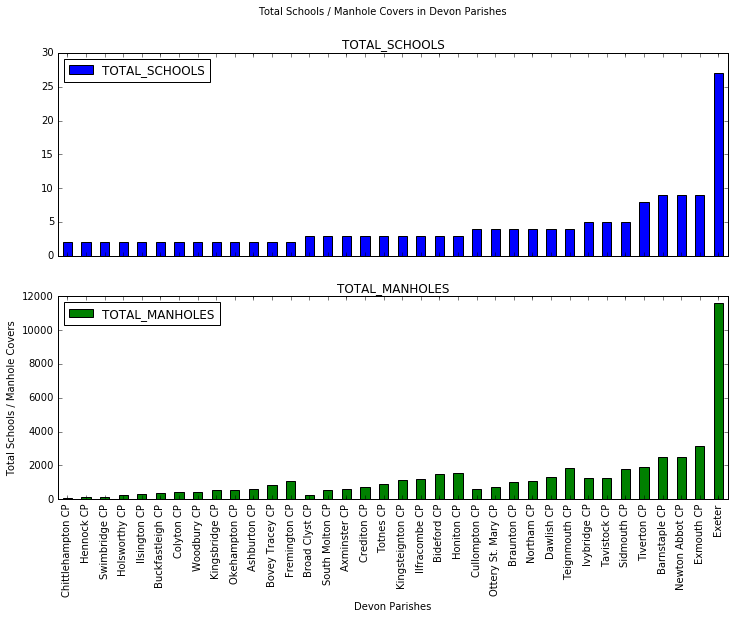

In [19]:
schools_manholes_df.plot.bar(x='PARISH', 
                             title="Total Schools / Manhole Covers in Devon Parishes", 
                             subplots=True,
                             figsize=(12,8))
plt.xlabel('Devon Parishes')
plt.ylabel('Total Schools / Manhole Covers')

In [20]:
#This plot seems to show a possible correlation between number of schools, 
#and number of manhole covers. Being able to plot both variables as separate plots is useful. 
#It would be nice to combine them onto the same plot, but the scale of manhole covers 
#(which run in the thousands) and schools (which run in single digits, apart from Exeter) mean 
#we're going to have to adjust the manhole numbers. Dividing by 100 should do the trick of 
#bringing the numbers down sufficiently that we can plot these variables on the same chart. 
#Also, I am going to up the threshold of bars to only include those with4 or more schools as 
#the chart still looks too crowded, even at this size.


In [21]:
#exclude rows with less than 3 schools
schools_manholes_df = schools_manholes_df[(schools_manholes_df['TOTAL_SCHOOLS'] >=3)] 
schools_manholes_df.shape[0]

23

In [22]:
#next, add another column to schools_manholes_df. We'll call it TOTAL_MANHOLES_HUNDREDS
schools_manholes_df['TOTAL_MANHOLES_HUNDREDS'] = (schools_manholes_df['TOTAL_MANHOLES'] / 100)

In [23]:
schools_manholes_df.head(5)

              PARISH  TOTAL_SCHOOLS  TOTAL_MANHOLES  TOTAL_MANHOLES_HUNDREDS
36    Broad Clyst CP              3             236                     2.36
181  South Molton CP              3             552                     5.52
7       Axminster CP              3             594                     5.94
62       Crediton CP              3             747                     7.47
202        Totnes CP              3             879                     8.79

In [24]:
#The school and manhole totals are now of the same magnitude, so should plot well. 
#We can now drop the TOTAL_MANHOLES column:
schools_manholes_df.drop('TOTAL_MANHOLES', axis=1, inplace=True)

In [25]:
schools_manholes_df.head(5)

              PARISH  TOTAL_SCHOOLS  TOTAL_MANHOLES_HUNDREDS
36    Broad Clyst CP              3                     2.36
181  South Molton CP              3                     5.52
7       Axminster CP              3                     5.94
62       Crediton CP              3                     7.47
202        Totnes CP              3                     8.79

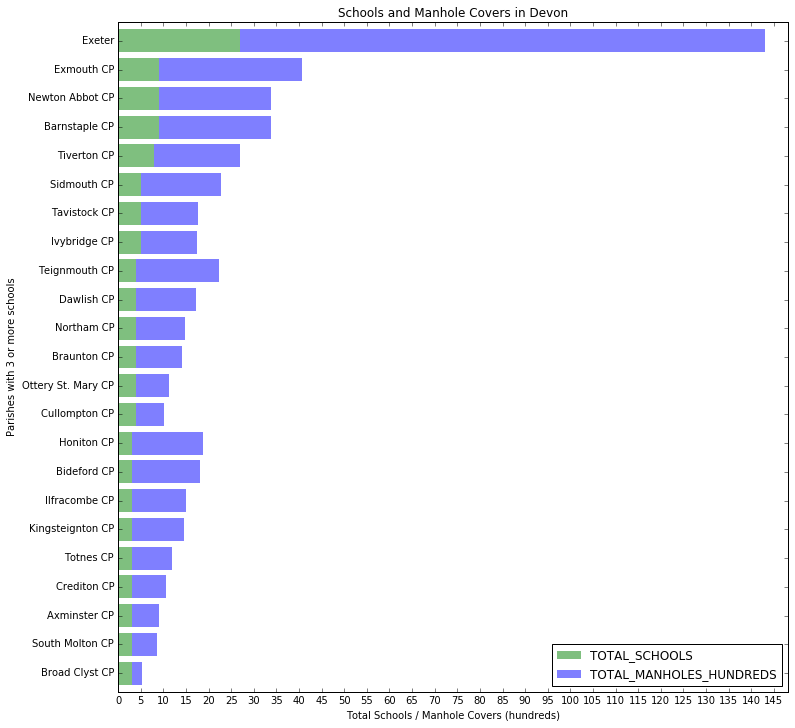

In [26]:
#now lets try to plot again. A horizonal, stacked chart seems to bring out the pattern better. 
#I've also adjusted the xticks to make it easier to read the values (as most are small), 
#and with bar and line width to fit the bars closer together and bring out the pattern.
schools_manholes_df.plot.barh(x='PARISH', y=['TOTAL_SCHOOLS','TOTAL_MANHOLES_HUNDREDS'],
                             title="Schools and Manhole Covers in Devon", 
                             figsize=(12,12),
                             xlim=(0, max(schools_manholes_df['TOTAL_MANHOLES_HUNDREDS']) + 
                                   max(schools_manholes_df['TOTAL_SCHOOLS']) + 5),
                             stacked=True,
                             color=['green','blue'],
                             alpha=0.5,
                             width=0.8,
                             linewidth=0,
                             xticks=range(0, 150, 5)
                            )
plt.ylabel('Parishes with 3 or more schools')
plt.xlabel('Total Schools / Manhole Covers (hundreds)')

This chart does seem to reveal a pattern in the data which in hindsight seems obvious: the higher the number of schools in a parish, the higher the number of manhole covers. The chart  shows a strong relationship with a step-change in the number of manholes as the number of schools increases. This could be explained by the fact that a higher number of schools in a parish indicates a higher population density, resulting in a need for a larger network of drains, which is therefore broadly reflected in a higher number of manhole covers.

However, this is not a precise linear relationship - looking at
the 9 smallest parishes in this chart (with only 3 schools each), the number of manholes range from 200 to about 1200. There is a similar spread of values for total manholes for those parishes with 4 and 5 schools. These variations could be caused by a number of reasons - some schools may be bigger than others, and hence serve more families in an area (which would show on the chart as parishes with unusually large number of manholes). As some geographical areas are 'unparished', it may be that some parishes make use of schools outside their parish, which again could be distorting the figures. Further, as most Devon parishes have a very small number of schools each (with only Exeter having more than 10 schools) this makes the results very sensitive to small variations in data, which might be eliminated if we had larger parishes in our dataset where such variations would be less prominent.

Even with these caveats however, there does seem to be good evidence here to support a relationship between total schools and total manholes covers in a parish.